# Redes Generativas Adversarias
Alrededor de la mitad del año 2014 algunos de los investigadores asociados al departamento de informática de la Universidad de Montreal proponen un nuevo marco de referencia para la estimación de un modelo Generativo basado en redes neuronales, el cual presentarón en el artículo que posteriormente otorgaría el nombre de este marco de referencia hasta el día de hoy llamado [Generative Adversarial Network](https://arxiv.org/pdf/1406.2661.pdf) *Goodfellow et al* o GAN, por sus siglas en inglés, como se les conoce popularmente. Pero antes que nada se hace necesario responder si quiera brevemente las siguientes cuestiones ¿Qué son los modelos generativos? ¿Qué son los procesos adversarios?

De acuerdo con [developers google](https://developers.google.com/) un [modelo generativo](https://developers.google.com/machine-learning/gan/generative) tiene la capacidad de capturar la probabilidad conjunta P(X,Y) o la densidad de probabilidad P(X) de un grupo de datos, lo que le permite en algunos casos crear objetos similares a dicho conjunto. Por otro lado, un proceso adversario en su forma mas simple es el procedimiento para entrenar dos modelos, para el caso específico de las GAN's son llamados `G` y `D`, a través de un proceso de optimización de juego **minimax**, donde después de un tiempo el entrenamiento se tiende a estabilizar causando que ambos modelos no aprendan mas el uno del otro *Goodfellow et al* .

El marco de referencia propuesto por *Goodfellow et al* consiste en dos redes neuronales: `G` como se le llama al modelo Generativo y `D` que se refiere a un modelo de clasificación que tratará de identificar que imagnes provienen del conjunto de datos real y cuales vienen de `G`. A este clasificador se le es llamado Modelo Discriminativo *Goodfellow et al*. Posteriormente de definir la arquitectura de ambos, se opta por entrenarlos con dos objetivos contrarios: Por parte de `G` se tratará de **maximizar** la probabilidad de que `D` se equivoque. Por otro lado, `D` buscará **minimizar** la probabilidad de caer en dicho error. Después de un amplio entrenamiento proceso de aprendizaje se estabilizará. De acuerdo con las estimaciones de los autores el **punto** donde no existes mas aprendizaje es cuando `D` se acercará a un valor constante de $\frac{1}{2}$. Se propone usar modelos de redes neuronales debido a el amplio y fácil uso del método de optimización basado en backpropagation.

De lo descrito por *Goodfellow et al* en su [artículo](https://arxiv.org/pdf/1406.2661.pdf) me gustaría extraer un fragmento con el que trata de explicar de manera ilustrativa el proceso adversario que existen en este framework que proponen: "El modelo generativo puede ser pensado de manera análoga como un equipo de falsificadores tratando de producir modena falsa los cuales la usan sin detección, por otro lado el modelo discriminativo es análogo a la policía que trata de detectar las falsificaciones. La competencia en este juego lleva a ambos equipos a mejorar en su tarea hasta que las falsificaciones de dinero son indetectables de los genuinos" 

## Detalles del entrenamiento
Este proceso inicia con la creación de un vector de ruido denotado por `z` que en algunas ocasiones es llamado *latent vector*. La creación de este vector obedece a una distribución de porbabilidad $p_z(z)$, donde en la mayoría de los casos es una distribución uniforme o Normal. 

Después se representa un mapeo al espacio de datos con $G(z; \theta_g)$, donde la función `G` es diferenciable y es una red neuronal cuyos pesos pertenecen al conjunto $\theta_g$. En paralelo también se define una función `D` diferenciable en forma de una red neuronal, cuyo mapeo de entrada es definido por $D(x; \theta_d)$ donde su salida es un escalar que **refleja** la probabilidad de que `x` provenga del conjunto de datos reales en lugar de $p_g$ (distribución de los datos generados). El modelo final puede ser visto de la siguiente manera:

![Diagrama DCGAN cortesía de developers google](https://developers.google.com/machine-learning/gan/images/gan_diagram.svg)

Los autores defienen los siguientes creterios de optimización y suposiciones: 
* **Criterio de optimización**: Entrenar `D` para maximizar la probabilidad de que los valores que provengan del dataset sean asignados con la etiqueta binaria 1, mientras que los que provengan de la distribución $p_g$ sean asignados con 0. 
* **Criterio de optimización***: Se entrenará `G` para que `D` asigne $p_g$ como 1.
* **Suposición**: El aprendizaje del generardor podrá ser efectivamente direccionado si el discriminador del que aprende se encuentra en su optimo global, es decir:$$D_G^*(x) = \frac{p_{data}(x)}{p_{data}(x) + p_G(x)}$$ Lo que implica que en ocaciones se deba enternar el Discriminador múltiples veces antes de entrenar el generador.

De acuerdo con *Goodfellow et all* la forma matemática de este problema es la siguiente:

$$
min_G~max_D~V(D, G) = \mathbf{E}_{x \sim p_{data}(x)}(logD(x)) + \mathbf{E}_{z \sim p_{z}(z)}(log(1 - D(G(z)))) \tag{1}
$$

Para un mejor entendimiento, recorramos la ecuación parte por parte:
* Lo referente a $\mathbf{E}_{x \sim p_{data}(x)}(...)$ tiene varias partes: $\mathbf{E}$ es el valor esperado o promedio y $x \sim p_{data}(x)$ especifíca el conjunto al que se va a evaluar su promedio, que para este caso vienen siendo todos los datos provenientes de los originales.
* Con respecto a $\mathbf{E}_{z \sim p_{z}(z)}(...)$ Las partes funcionan de igual manera que en el anterior, un único distinto es que este apartado $z \sim p_{z}(z)$ especifica que el conjunto obetivo es `z` en este caso.

La figura 1 de *Goodfellow et al* ilustra de gran manera este proceso:
![Proceso de entrenamiento de GAN obtenido de Goodfellow et al](../imagenes/figura_1_Goodfellow_GAN.PNG)

Explicando el código de colores y líneas: 
1. La línea punteada azul corresponde al valor escalar de `D` en el espacio de datos.
2. La línea de puntos negra corresponde al valor de la función de densidad de probabilidad de los datos reales en el dominio definido en la gráfica. **Esta es la distribución que queremos imitar con nuestro modelo generativo**.
3. La linea continua verde correponde la función de densidad probabilidad de las imágenes generadas en ese instante de tiempo por `G`.
4. La línea horizontal `x` es el espacio de datos completo.
5. Las líneas continuas negras que van de la línea horizontal marcada como`z` a la líena horizontal `x` corresponde al mapeo realizado por $G(z)$ en el espacio de datos.

En el instante de tiempo $(a)$ podemos asumir que las dos distribuciones (las generadas y las originales) son cercanas y `D` es un clasificador acercandose a su punto óptimo.

En el instante de tiempo $(b)$ el discriminador `D` llega a su punto optimo, y por medio del aprendizaje de G este se acerca aún mas a la distribución deseada.

En el instante de tiempo $(c)$ el gradiente porvisto por el discriminador `D` va guiando de mejor manera los pesos de `G` para que este pueda mapear eficazmente el *latent vector* con el espacio de datos donde es mas probable encontrar los datos originales.

Por último, en el instante de tiempo $(d)$ el discriminador no puede direccionar mas el gradiente de `G` ya que las dos distribuciones son iguales, lo que hace `D` no pueda identificar la diferencia. Así su valor a partir de este punto siempre será $\frac{1}{2}$

Como vimos en la figura de propositos pedagógicos anterior, `D` es una parte crucial del problema debido a que debe porder diferenciar complemetamente entre los datos reales y los generados, ya que es computacionalmente prohibitivo. Se trará de que `D` sea completamente entrenado antes de que lo haga `G`, para esto se crea un nuevo hiperparámetro denotado como $k$ el cual es la cantidad de pasos de optimización que el algoritmo hace sobre `D` antes de hacer un paso en `G`. El buen ajuste de $k$ causará que `D` se aproxime al punto óptimo y hace que `G` cambie lo suficientemente lento. *Goodfellow et al* presentan el algoritmo en la siguiente imagen.

![Algoritmo de entrenamiento GAN obtenido de Goodfellow et al](../imagenes/Algoritmo_entrenamiento_GAN.PNG)

De acuerdo con *Goodfellow et al* la ecuación $(1)$ en ocaciones no provee suficiente gradiente para que `G` aprende, esto sobre todo en el principio del entrenamiento. Según los autores `D` puede rechazar los ejemplos que tengan alta confiabilidad de resultado, es decir, al principio para `D` es muy claro que los ejemplo generados con muy disntintos a los reales. **Así que en lugar de netrenar a `G` para minimizar $log(1- D(G(z)))$ trate de maximizar $logD(G(z))$**. Esto eventualmente nos llevará al mismo punto de entrenamiento sin embargo `D` proverá un mejor gradiente para `G`.

A continuación, tataremos de imitar de la mejor manera la arquitectura para una GAN usando los conjuntos de datos MNIST y CIFAR-10:

# Configurando nuestro entorno
Lo primero que necesitamos es llamar las librerías, funciones y conjuntos de datos necesarios para realizar la tarea:

In [1]:
import os
import numpy as np
from math import sqrt
import matplotlib as mpl
import matplotlib.pyplot as plt
from IPython import display
from tqdm.notebook import tqdm
import tensorflow_datasets as tfds
import tensorflow as tf
from helper_func.custom_layers import Maxout
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.optimizers.schedules import LearningRateSchedule
from tensorflow.keras.optimizers import SGD
from tensorflow.keras.losses import BinaryCrossentropy
from tensorflow.train import Checkpoint, CheckpointManager

plt.rcParams['figure.figsize'] = [12, 8]

Cargamos los datos, para esto vamos a usar el conjunto de números escritos a mano, popularmente llamado [MNIST](http://yann.lecun.com/exdb/mnist/). Se distribulle de este manera por que así es como lo realizan los autores de la investigación.

In [2]:
mnist, mnist_test = tfds.load(
    'mnist', 
    split=['train[:50000]', 'train[50000:]'], 
    data_dir='./', 
    as_supervised=True, 
    shuffle_files=True
)

Observemos los primeros 20 elementos de nuestro dataset

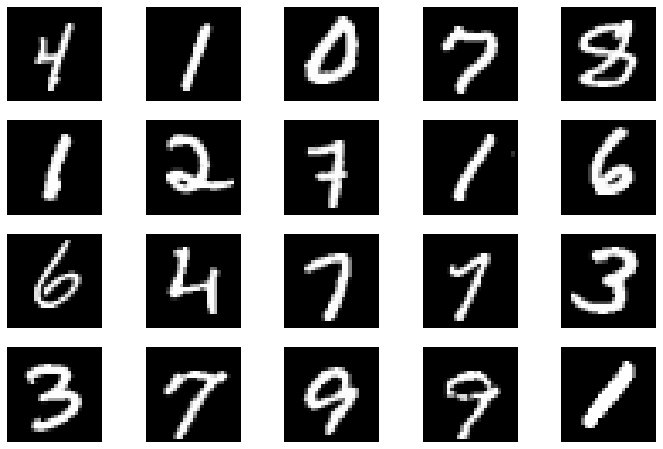

In [3]:
sample = mnist.take(20)

fig = plt.gcf()

for i, x in sample.enumerate(start=1):
    image, _ = x
    ax = fig.add_subplot(4, 5, i.numpy())
    ax.imshow(image[:, :, 0], cmap='gray')
    ax.axis('off')

En esta parte definiremos las constantes de entrenamiento. Es libre de modificarlos para probar nuevos puntos de partida de entrenamiento. 

In [4]:
SEED = 777
M = len(mnist)
M_test = len(mnist_test)
LATENT_SIZE = 100
LEARNING_RATE = .1
BATCH_SIZE = 100
FOLDS_LL = 20
BATCH_SIZE_TEST = M_test // FOLDS_LL
BUFFER_TEST = 3000
BUFFER = 1000
INIT_MOMENTUM = .5
EPOCHS = 50
K = 1

# Adecuando el conjunto de datos
En este apartado adecuaremos el dataset para que sea entrada del Discriminator. Los investiagadores hacen una inicialización especial del término bias del la última capa del generador llamada `init_sigmoid_bias_from_marginals`, la cual trataremos de replicar acá. 

In [5]:
def norm_img(image, label):
    return tf.keras.backend.flatten(tf.cast(image, tf.float32)/255.)

In [6]:
mnist = mnist.map(
    norm_img, num_parallel_calls=tf.data.experimental.AUTOTUNE)

In [7]:
mean_dataset = mnist.reduce(np.float32(0), lambda x,y: x/float(M) + y).numpy()
mean_dataset = np.clip(mean_dataset, 1e-7, 1-1e-7)
init_last_bias_gen = tf.convert_to_tensor(np.log(mean_dataset / (1. - mean_dataset)), dtype= tf.float32)

In [8]:
mnist_test = mnist_test.map(norm_img, num_parallel_calls=tf.data.experimental.AUTOTUNE)
mnist_test = mnist_test.shuffle(BUFFER_TEST).batch(BATCH_SIZE_TEST)

In [9]:
mnist = mnist.shuffle(BUFFER)
mnist = mnist.batch(BATCH_SIZE)
mnist = mnist.cache()
mnist = mnist.repeat()
mnist = mnist.prefetch(tf.data.experimental.AUTOTUNE)

Convertimos los datos en una variable [`tf.data.Iterator`](https://www.tensorflow.org/api_docs/python/tf/data/Iterator) para poder "pedir" nuestros datos k veces en cada paso de entrenamiento

In [10]:
mnist = iter(mnist)


# Construcción de modelos
Construimos nuestro **Generator** y **Discriminator** la GAN basada en en conjunto de datos MNIST. La arquitectura desarrollada por el investigador la puede encontrar [aqui](https://github.com/goodfeli/adversarial/blob/master/mnist.yaml):

## Generator
Como se dijo el **Generator** es un modelo basado en redes neuronales encargado de aprender la distribución del conjunto de datos real a partir del proceso adversario. Por otra parte, su entrada corresponde a un "latent vector" $z$ el cual tiene una distriución de probabilidad $p_z$ asociada. En este caso el autor elige en vector $z \in \mathbb{R}^{100}$ y $p_z = U(-\sqrt{3}, \sqrt{3})$

In [11]:
def make_generator():
    # Los autores hacen una serie de inicializaciones de pesos que se replicarán
    init_kernel_gen = tf.random_uniform_initializer(-.05 , .05, seed=SEED)
    model = Sequential([
        Dense(1200, activation='relu', kernel_initializer=init_kernel_gen, input_shape=(100,)),
        Dense(1200, activation='relu', kernel_initializer=init_kernel_gen),
        Dense(784, activation='sigmoid', kernel_initializer=init_kernel_gen)
    ])
    
    return model  

In [12]:
gen = make_generator()
gen.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 1200)              121200    
_________________________________________________________________
dense_1 (Dense)              (None, 1200)              1441200   
_________________________________________________________________
dense_2 (Dense)              (None, 784)               941584    
Total params: 2,503,984
Trainable params: 2,503,984
Non-trainable params: 0
_________________________________________________________________


Aplicamos la inicialización del bias de la última capa del **Generator**

In [13]:
_ = gen.trainable_variables[-1].assign(init_last_bias_gen)

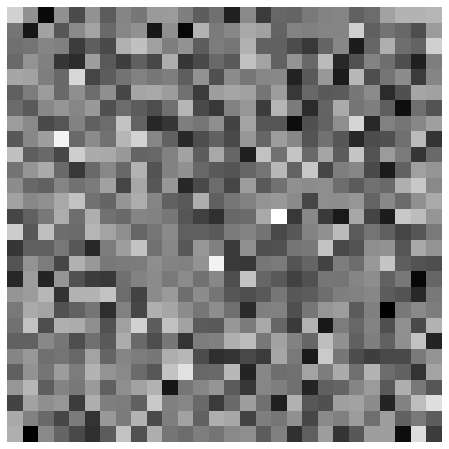

In [14]:
gen = make_generator()
noise = tf.random.uniform([1, 100], minval=-1.*sqrt(3.), maxval=sqrt(3.), seed=SEED)
generated_image = gen(noise, training=False)
generated_image = tf.reshape(generated_image, (28, 28))
plt.imshow(generated_image.numpy(), cmap='gray')
_ = plt.axis('off')

## Discriminator
El **discriminator**, al igual que generator es un modelo basado en redes neuronales. Su función es definir si una entrada es similar o no al conjunto real. Los autores implementan la capa [Maxout](https://arxiv.org/pdf/1302.4389.pdf) propuesta por *Goodfellow et al*, la cual (en una descripción breve) obtiene el máximo de una serie de combinaciones lineales de las entradas y es que para ellos explota de mejor manera las características de la técnica *Dropout*, para mayor información remitace al artículo en el link.

In [15]:
def make_discriminator():
    # El autor hace una serie de inicializaciones de pesos que se replicarán
    init_kernel = tf.random_uniform_initializer(-.005 , .005, seed=SEED)
    model = Sequential([
        Dropout(.2, seed=SEED, input_shape=(784,)),
        Maxout(240, 5, kernel_initializer=init_kernel),
        Dropout(.5, seed=SEED),
        Maxout(240, 5, kernel_initializer=init_kernel),
        Dropout(.5, seed=SEED),
        Dense(1, activation='sigmoid', kernel_initializer=init_kernel),
    ])
    
    return model

In [16]:
disc = make_discriminator()
disc.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dropout (Dropout)            (None, 784)               0         
_________________________________________________________________
maxout (Maxout)              (None, 240)               942000    
_________________________________________________________________
dropout_1 (Dropout)          (None, 240)               0         
_________________________________________________________________
maxout_1 (Maxout)            (None, 240)               289200    
_________________________________________________________________
dropout_2 (Dropout)          (None, 240)               0         
_________________________________________________________________
dense_6 (Dense)              (None, 1)                 241       
Total params: 1,231,441
Trainable params: 1,231,441
Non-trainable params: 0
____________________________________________

In [17]:
disc = make_discriminator()
decision = disc(tf.reshape(generated_image, (1, -1)))
print(decision)

tf.Tensor([[0.49995932]], shape=(1, 1), dtype=float32)


## Definición de la métrica de evaluación
Siempre es bueno tener alguna métrica que nos pueda direccionar nuestro entrenamiento. En este caso ya que trabajamos con un problema no supervisado, es difícil encontrar alguna, sin embargo los autores eligen el la métrica **log likelihood** a través de una ventana Gaussiana de Parzen, esto con el fin de estimar la probabilidad que los datos de testeo se encuentren en la distribución $p_g$, para mayor información leer el siguiente [artículo](http://proceedings.mlr.press/v9/desjardins10a/desjardins10a.pdf). El cálculo es algo denso, así que se elige partir el análisis en 10 batch. Para el caso del Dataset MNIST los autores definen $\sigma = 0.2$

**NOTA 1:** Está forma de hacer el cálculo es arbitraria, no me estoy enfocando en la métrica de comparación si no en el proceso de las GAN.

**NOTA 2:** La formula `parzen` es la misma de este [link](https://github.com/goodfeli/adversarial/blob/master/__init__.py) la función allí es llamada `theano_parzen`

In [18]:
def parzen(data, samples, sigma):
    x = data[:, None, :]
    s = samples[None, :, :]
    fracc = -.5 * ((x - s)/sigma)**2
    exp_gaus = tf.reduce_sum(fracc, axis=-1)
    
    max_ = tf.reduce_max(exp_gaus, axis = -1)
    
    E = max_ + tf.math.log(tf.reduce_mean(tf.math.exp(exp_gaus - max_[:, None]), axis=-1))
    Z = samples.shape[1] * tf.math.log(sigma * tf.math.sqrt(np.pi * 2))
    
    return tf.reduce_mean(E - Z)

In [19]:
def ll_metric(test):
    noise = tf.random.uniform((M_test, 100), minval=-1.*sqrt(3.), maxval=sqrt(3.), seed=SEED)
    S = gen(noise, training=False)
    ll = []
    i = 0
    for test_batch in tqdm(mnist_test, desc='Log-likelihood Validation', leave=False):
        ll.append(parzen(test_batch, S[i:i+test_batch.shape[0]], .2).numpy())
        i += test_batch.shape[0]
    ll = np.array(ll)
    return ll.mean(), ll.std()

Este cálculo es muy intensivo, así que en un computador le puede tardar un minutos.

In [20]:
# ll_metric(mnist_test)

(-1732.0729, 2.8834276)

## Definición funciones de costo y optimizadores
En este apartado se definirán las funciones de costo para la actualización de las variables del **Discriminator** y la función del costos del **Generator**. Además se especificará los optimizadores de para el **Generator** y **Discriminator** con la respectiva programación de la tasa de aprendizaje y momentum. Empezaremos por estos últimos:

**NOTA:** La programación de la tasa de aprendizaje y el ajuste del momentum es basado en las funciones respectivas usadas por los investigadores de la librería [pylearn2](https://github.com/lisa-lab/pylearn2)

In [21]:
# Forma de disminución de tasa de aprendizaje usada por los autores
class ExponentialDecayGANPaper(LearningRateSchedule):
    
    def __init__(self, init_lr=.1, decay_factor = 1.0003, min_lr=1e-6):
        self.init_lr = tf.cast(init_lr, tf.float32)
        self.decay_factor = tf.cast(decay_factor, tf.float32)
        self.min_lr = tf.cast(min_lr, tf.float32)
    
    def __call__(self, step):
        step = tf.cast(step, tf.float32)
        lr = self.init_lr * tf.math.pow(tf.constant(1., dtype=tf.float32)/self.decay_factor, step)
        return tf.cond(lr > self.min_lr, lambda: lr, lambda: self.min_lr)
    
    def get_config(self):
        return {
            'init_lr': self.init_lr,
            'decay_factor': self.decay_factor,
            'min_lr': self.min_lr,
        }        

In [22]:
lr_scheduler = ExponentialDecayGANPaper(init_lr=LEARNING_RATE, decay_factor=1.000004)

In [23]:
class MomentumAdjustor():
    def __init__(self, init_momentum=.5, final_momentum=.7, start=1, saturate=250):
        self.init_momentum=init_momentum
        self.final_momentum=final_momentum
        self.start=start
        self.saturate=saturate
        
    def __call__(self, epoch):
        eta = float(epoch - self.start) / float(self.saturate - self.start)
        if eta < 0.:
            eta = 0.
        elif eta > 1.:
            eta = 1.
        return np.float32(self.init_momentum*(1. - eta) + eta*self.final_momentum)

In [24]:
gen_opt = SGD(learning_rate=lr_scheduler, momentum=INIT_MOMENTUM)
disc_opt = SGD(learning_rate=lr_scheduler, momentum=INIT_MOMENTUM)

In [25]:
momentum_scheduler = MomentumAdjustor(INIT_MOMENTUM, final_momentum=.7, start=1, saturate=250)

In [26]:
loss = BinaryCrossentropy()

In [27]:
def discriminator_loss(real_output, fake_output):
    real_loss = loss(tf.ones_like(real_output), real_output)
    fake_loss = loss(tf.zeros_like(fake_output), fake_output)
    total_loss = real_loss + fake_loss
    return .5 * total_loss

In [28]:
def generator_loss(fake_output):
    return loss(tf.ones_like(fake_output), fake_output)

## Puntos de control
Acá ubicaremos donde serán gardados los puntos de control del epoch mas actual y del epoch con la mejor métrica de entrenamiento.

In [29]:
checkpoint = Checkpoint(gen=gen, disc=disc, gen_opt=gen_opt, disc_opt=disc_opt)
manager_best_metric = CheckpointManager(checkpoint, directory="./checkpoint_mnist_model/best_metric", max_to_keep=1)
manager_cpkt = CheckpointManager(checkpoint, directory="./checkpoint_mnist_model/train_progress", max_to_keep=3)

## Creando un ciclo de entrenamiento
A continuación crearemos un ciclo de entrenamiento dependiedo de las ocaciones que el **Discriminator** se debe actualizar ($k$) con respecto al **Generator**, recuerde que entre mayor cantidada de actualizaciones requiera `D` mas lento será el proceso de entrenamiento. En este caso se definío como $k = 1$. También haremos una función para la visualización del entrenamiento de manera cualitativa:

In [30]:
def generate_image(generator, row, col, seed = SEED):
    latent_vector = tf.random.uniform((int(row*col),LATENT_SIZE), minval=-1.*sqrt(3.), maxval=sqrt(3.), seed=seed)
    gen_images = generator(latent_vector, training=False)
    
    fig = plt.gcf()
    
    for i in range(int(row*col)):
        ax = fig.add_subplot(int(row), int(col), i+1)
        ax.imshow(tf.reshape(gen_images[i], (28,28)), cmap='gray')
        ax.axis('off')
    plt.show()

In [31]:
def train_disc_only(images):
    noise = tf.random.uniform((images.shape[0],LATENT_SIZE), minval=-1.*sqrt(3.), maxval=sqrt(3.))   
        
    with tf.GradientTape() as tape:
        generate_imgs = gen(noise, training=True)
        
        real_output = disc(images, training=True)
        fake_output = disc(generate_imgs, training=True)
        
        disc_loss = discriminator_loss(real_output, fake_output)
        
    grads = tape.gradient(disc_loss, disc.trainable_variables)
    disc_opt.apply_gradients(zip(grads, disc.trainable_variables))

In [32]:
def train_gen_step():
    noise = tf.random.uniform((BATCH_SIZE,LATENT_SIZE), minval=-1.*sqrt(3.), maxval=sqrt(3.))   

    with tf.GradientTape() as gen_tape, tf.GradientTape() as disc_tape:
        generate_imgs = gen(noise, training=True)
        
        fake_output = disc(generate_imgs, training=True)
        
        gen_loss = generator_loss(fake_output)

        
    gen_grads = gen_tape.gradient(gen_loss, gen.trainable_variables)
    gen_opt.apply_gradients(zip(gen_grads, gen.trainable_variables))

### Entrenamiento
Ahora realizaremos el entrenamiento. Tenga encuenta que en un Computador sin GPU cada epoch tomará entre 2:30 y 3:30 minutos. Puede evitar el entrenamiento cargando el punto de control en el epoch con mejor métrica de entrenamiento descomentando la siguiente celda. 

In [33]:
manager_best_metric.restore_or_initialize()

'./checkpoint_mnist_model/best_metric\\ckpt-989'

#### Loop de entrenamiento

In [ ]:
max_ll = [-np.inf, 0.]

In [ ]:
for epoch in range(EPOCHS):
    # "Ajustar el nuevo momentum de acuerdo al epoch"
    gen_opt.momentum.assign(momentum_scheduler(epoch+1))
    disc_opt.momentum.assign(momentum_scheduler(epoch+1))
    
    # Pasos de entrenamiento por cada batch
    for step in tqdm(range(M // BATCH_SIZE), desc='Steps', leave=False):
        
        for _ in range(K):
            images = mnist.get_next_as_optional()
            images = images.get_value()
            train_disc_only(images)
        
        train_gen_step()
    
    ll_mean, ll_std = ll_metric(mnist_test)
    
    # Esta es la forma simple de seleccionar el mejor punto de control, sin embargo
    # podría evaluar si es estadísticamente significativa la mejora antes de actualizar
    # el punto de control
    if max_ll[0] < ll_mean:
        manager_best_metric.save(checkpoint_number=epoch+1, check_interval=False)
        max_ll[0] = ll_mean
        max_ll[1] = ll_std
    manager_cpkt.save(checkpoint_number=epoch+1)
    display.clear_output(wait=True)
    print(f'Epoch: {epoch + 1}')
    print(f'Log-likelihood: {ll_mean:4.2f} +/- {ll_std:4.4f}, Max ll: {max_ll[0]:4.2f} +/- {max_ll[1]:2.4f}')
    generate_image(gen, 4, 5)

## Verificar resultados
A continuación de manera cualitativa verificaremos si los datos generados son parecidos a los reales. Los autores usan varias métricas para esto, si tiene dudas remítase al [artículo](https://arxiv.org/pdf/1406.2661.pdf)

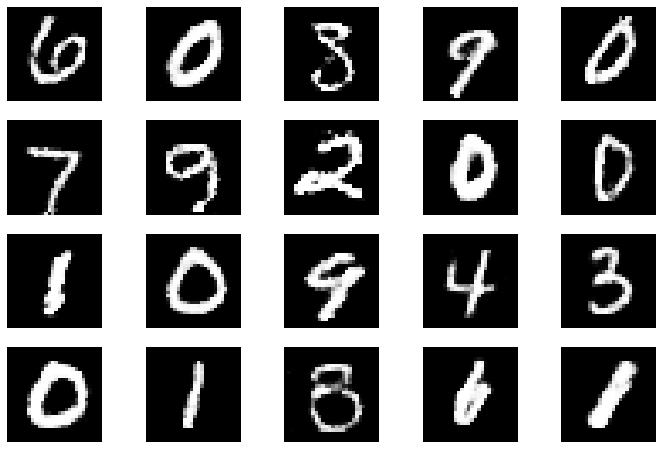

In [34]:
generate_image(gen, 4, 5)

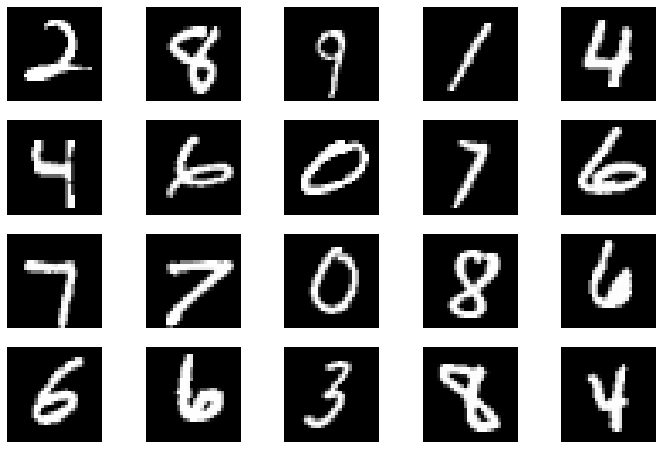

In [35]:
fig = plt.gcf()
real_images = mnist.get_next_as_optional()
real_images = real_images.get_value()
real_images = real_images[:20]
for i in range(20):
    ax = fig.add_subplot(4, 5, i+1)
    ax.imshow(tf.reshape(real_images[i,:], (28,28)), cmap='gray')
    ax.axis('off')
plt.show()

## Interpolación de los números
Si tomamos dos números aleatorios y realizamos una interpolación lineal entre ellos podremos ver una transformación de uno a otro.

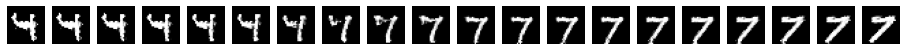

In [36]:
uppper_limit_noise = tf.random.uniform((LATENT_SIZE,), minval=-1.*sqrt(3.), maxval=sqrt(3.), seed=SEED)
bottom_limit_noise = tf.ones((LATENT_SIZE,)) * -1.*sqrt(3.)

generate_interp_noise = tf.linspace(bottom_limit_noise, uppper_limit_noise, 20, axis=0)

fig = plt.figure(figsize=(16,2))
generate_interp_imgs = gen(generate_interp_noise, training=False)
for i in range(20):
    ax = fig.add_subplot(1, 20, i+1)
    ax.imshow(tf.reshape(generate_interp_imgs[i], (28,28)), cmap='gray')
    ax.axis('off')

## Guardar generador
La siguiente celda guardará el generador creado para su posterior uso.

In [ ]:
saved_dir = './generator_mnist/1/'
tf.saved_model.save(gen, saved_dir)